In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") 
sns.set(style="darkgrid")  
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, r2_score
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
print(os.getcwd())

c:\Users\masukumec\OneDrive - Botswana Power Corporation\CHRISTOPHER MASUKUME\GIS DATA\Documentation\IU International University of Applied Sciences\Other Modules\Data Quality and Data Wrangling\Titanic_Classification_&_EDA


Data Exploration by Data Description

In [2]:
train_data = pd.read_csv(r"C:\Users\masukumec\OneDrive - Botswana Power Corporation\CHRISTOPHER MASUKUME\GIS DATA\Documentation\IU International University of Applied Sciences\Other Modules\Data Quality and Data Wrangling\Project\Data\train_data.csv")
train_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data = pd.read_csv(r"C:\Users\masukumec\OneDrive - Botswana Power Corporation\CHRISTOPHER MASUKUME\GIS DATA\Documentation\IU International University of Applied Sciences\Other Modules\Data Quality and Data Wrangling\Project\Data\test.csv")
test_data.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
print(train_data.columns.values)
print(test_data.columns.values)
# Load the dataset

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']
['PassengerId' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Cabin' 'Embarked']


In [5]:
# summary of the train dataset
train_data.describe(include = "all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [6]:
train_data.info()

# Check for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


Data Exploration by Data Visualization

percentage of women who survived:  0.7420382165605095
percentage of men who survived:  0.18890814558058924


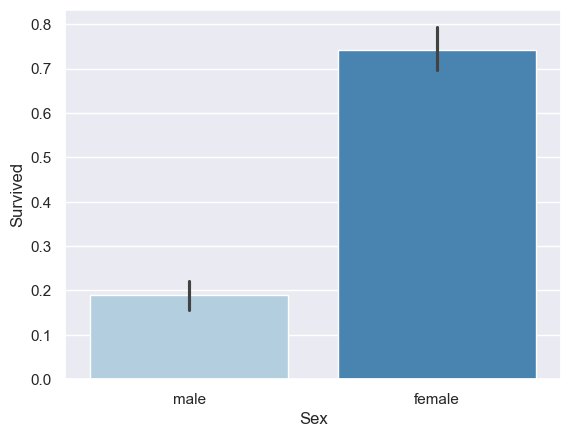

In [8]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women) / len(women)
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men) / len(men)
sns.barplot(x='Sex', y='Survived', data=train_data, palette='Blues')
print("percentage of women who survived: ", rate_women)
print("percentage of men who survived: ", rate_men)

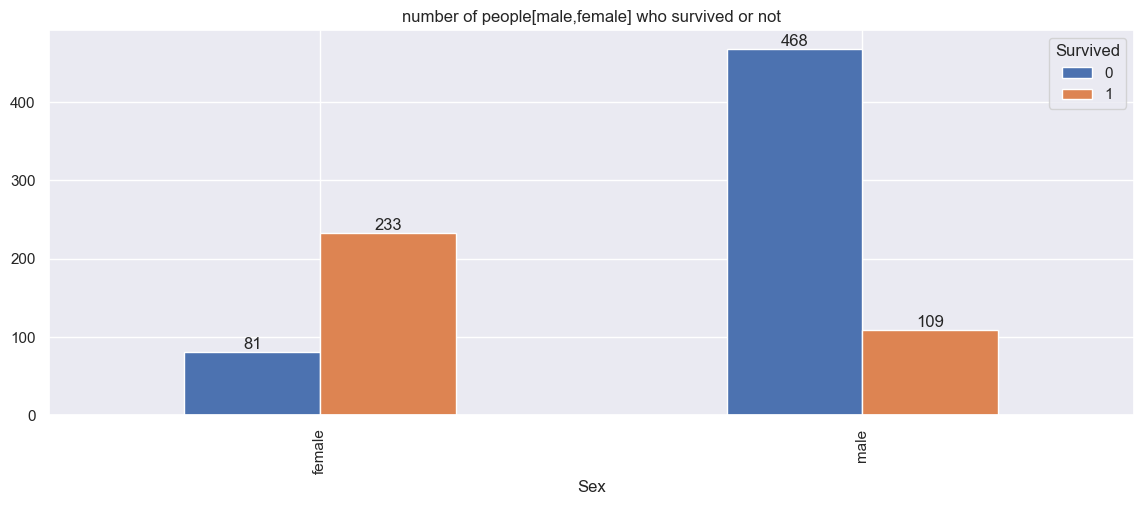

In [9]:
b=pd.crosstab(train_data['Sex'],train_data['Survived']).plot(kind='bar',figsize=(14,5))
plt.title('number of people[male,female] who survived or not')

for i in b.containers:
    b.bar_label(i)
plt.show()

Percentage of Pclass = 1 who survived: 62.96296296296296
Percentage of Pclass = 1 who did not survive: 37.03703703703704
Percentage of Pclass = 2 who survived: 47.28260869565217
Percentage of Pclass = 2 who did not survive: 52.71739130434783
Percentage of Pclass = 3 who survived: 24.236252545824847
Percentage of Pclass = 3 who did not survive: 75.76374745417516


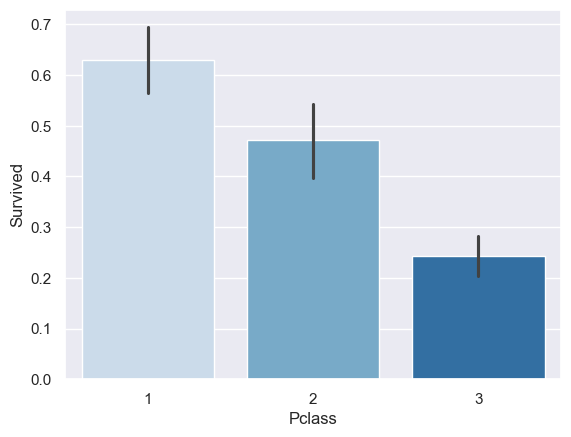

In [10]:
#draw a bar plot of survival by Pclass
sns.barplot(x="Pclass", y="Survived", data=train_data, palette='Blues') 

#print percentage of people on pclass based on survival	
print("Percentage of Pclass = 1 who survived:", train_data["Survived"][train_data["Pclass"] == 1].value_counts(normalize = True)[1]*100)
print("Percentage of Pclass = 1 who did not survive:", train_data["Survived"][train_data["Pclass"] == 1].value_counts(normalize = True)[0]*100)

print("Percentage of Pclass = 2 who survived:", train_data["Survived"][train_data["Pclass"] == 2].value_counts(normalize = True)[1]*100)
print("Percentage of Pclass = 2 who did not survive:", train_data["Survived"][train_data["Pclass"] == 2].value_counts(normalize = True)[0]*100)

print("Percentage of Pclass = 3 who survived:", train_data["Survived"][train_data["Pclass"] == 3].value_counts(normalize = True)[1]*100)
print("Percentage of Pclass = 3 who did not survive:", train_data["Survived"][train_data["Pclass"] == 3].value_counts(normalize = True)[0]*100)



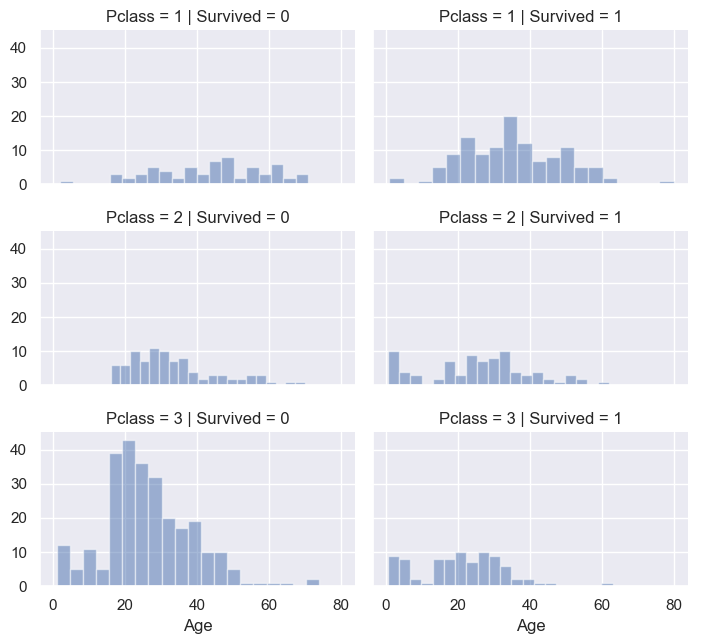

In [11]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train_data, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

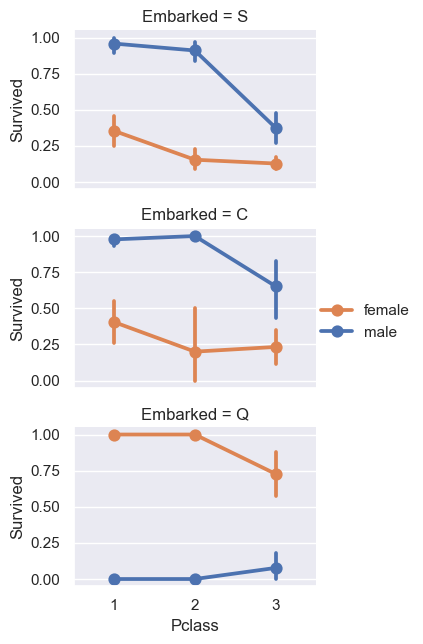

In [12]:
# grid = sns.FacetGrid(train_data, col='Embarked')
grid = sns.FacetGrid(train_data, row='Embarked', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

Sex
male      577
female    314
Name: count, dtype: int64


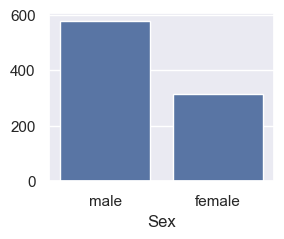

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


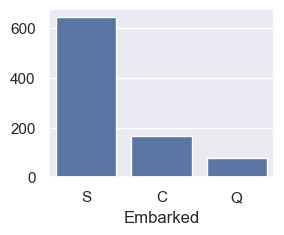

Pclass
3    491
1    216
2    184
Name: count, dtype: int64


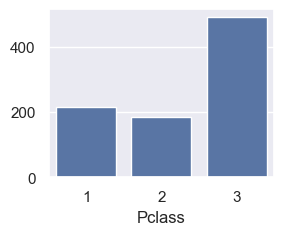

In [13]:
# the count of individuals in each class
columns = ['Sex', 'Embarked', 'Pclass']
for index, v in enumerate(columns):
    plt.Figure(figsize=(15, 7), dpi=100)

    plt.subplot(2,2,index+1)
    print(train_data[v].value_counts())
    value = train_data[v].value_counts().values
    index = train_data[v].value_counts().index
    sns.barplot(x=index, y=value)
    plt.show()

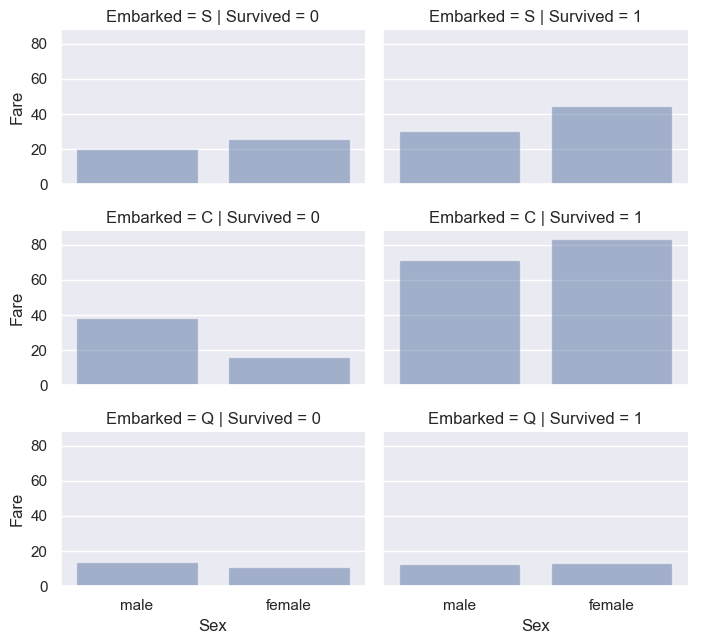

In [14]:
# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(train_data, row='Embarked', col='Survived', height=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

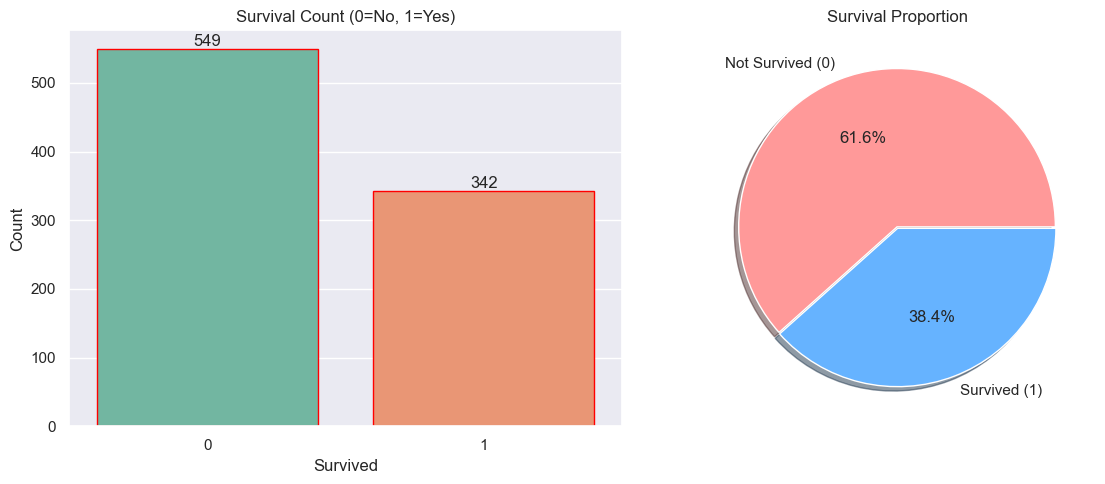

In [15]:
a = train_data['Survived'].value_counts()
plt.figure(figsize=(12, 5))  # Adjusted width to accommodate both plots

# Bar Plot (Left)
plt.subplot(1, 2, 1)
bar = sns.barplot(x=a.index, y=a.values, palette='Set2', edgecolor='red')
plt.title('Survival Count (0=No, 1=Yes)')
plt.xlabel('Survived')
plt.ylabel('Count')

# Add value labels on bars
for index, value in enumerate(a.values):
    bar.text(index, value, f'{value}', ha='center', va='bottom')

# Pie Chart (Right)
plt.subplot(1, 2, 2)
plt.pie(a.values, labels=['Not Survived (0)', 'Survived (1)'], 
        autopct='%1.1f%%', explode=[0.01, 0], shadow=True, colors=['#ff9999','#66b3ff'])
plt.title('Survival Proportion')

plt.tight_layout()  # Prevent overlapping
plt.show()

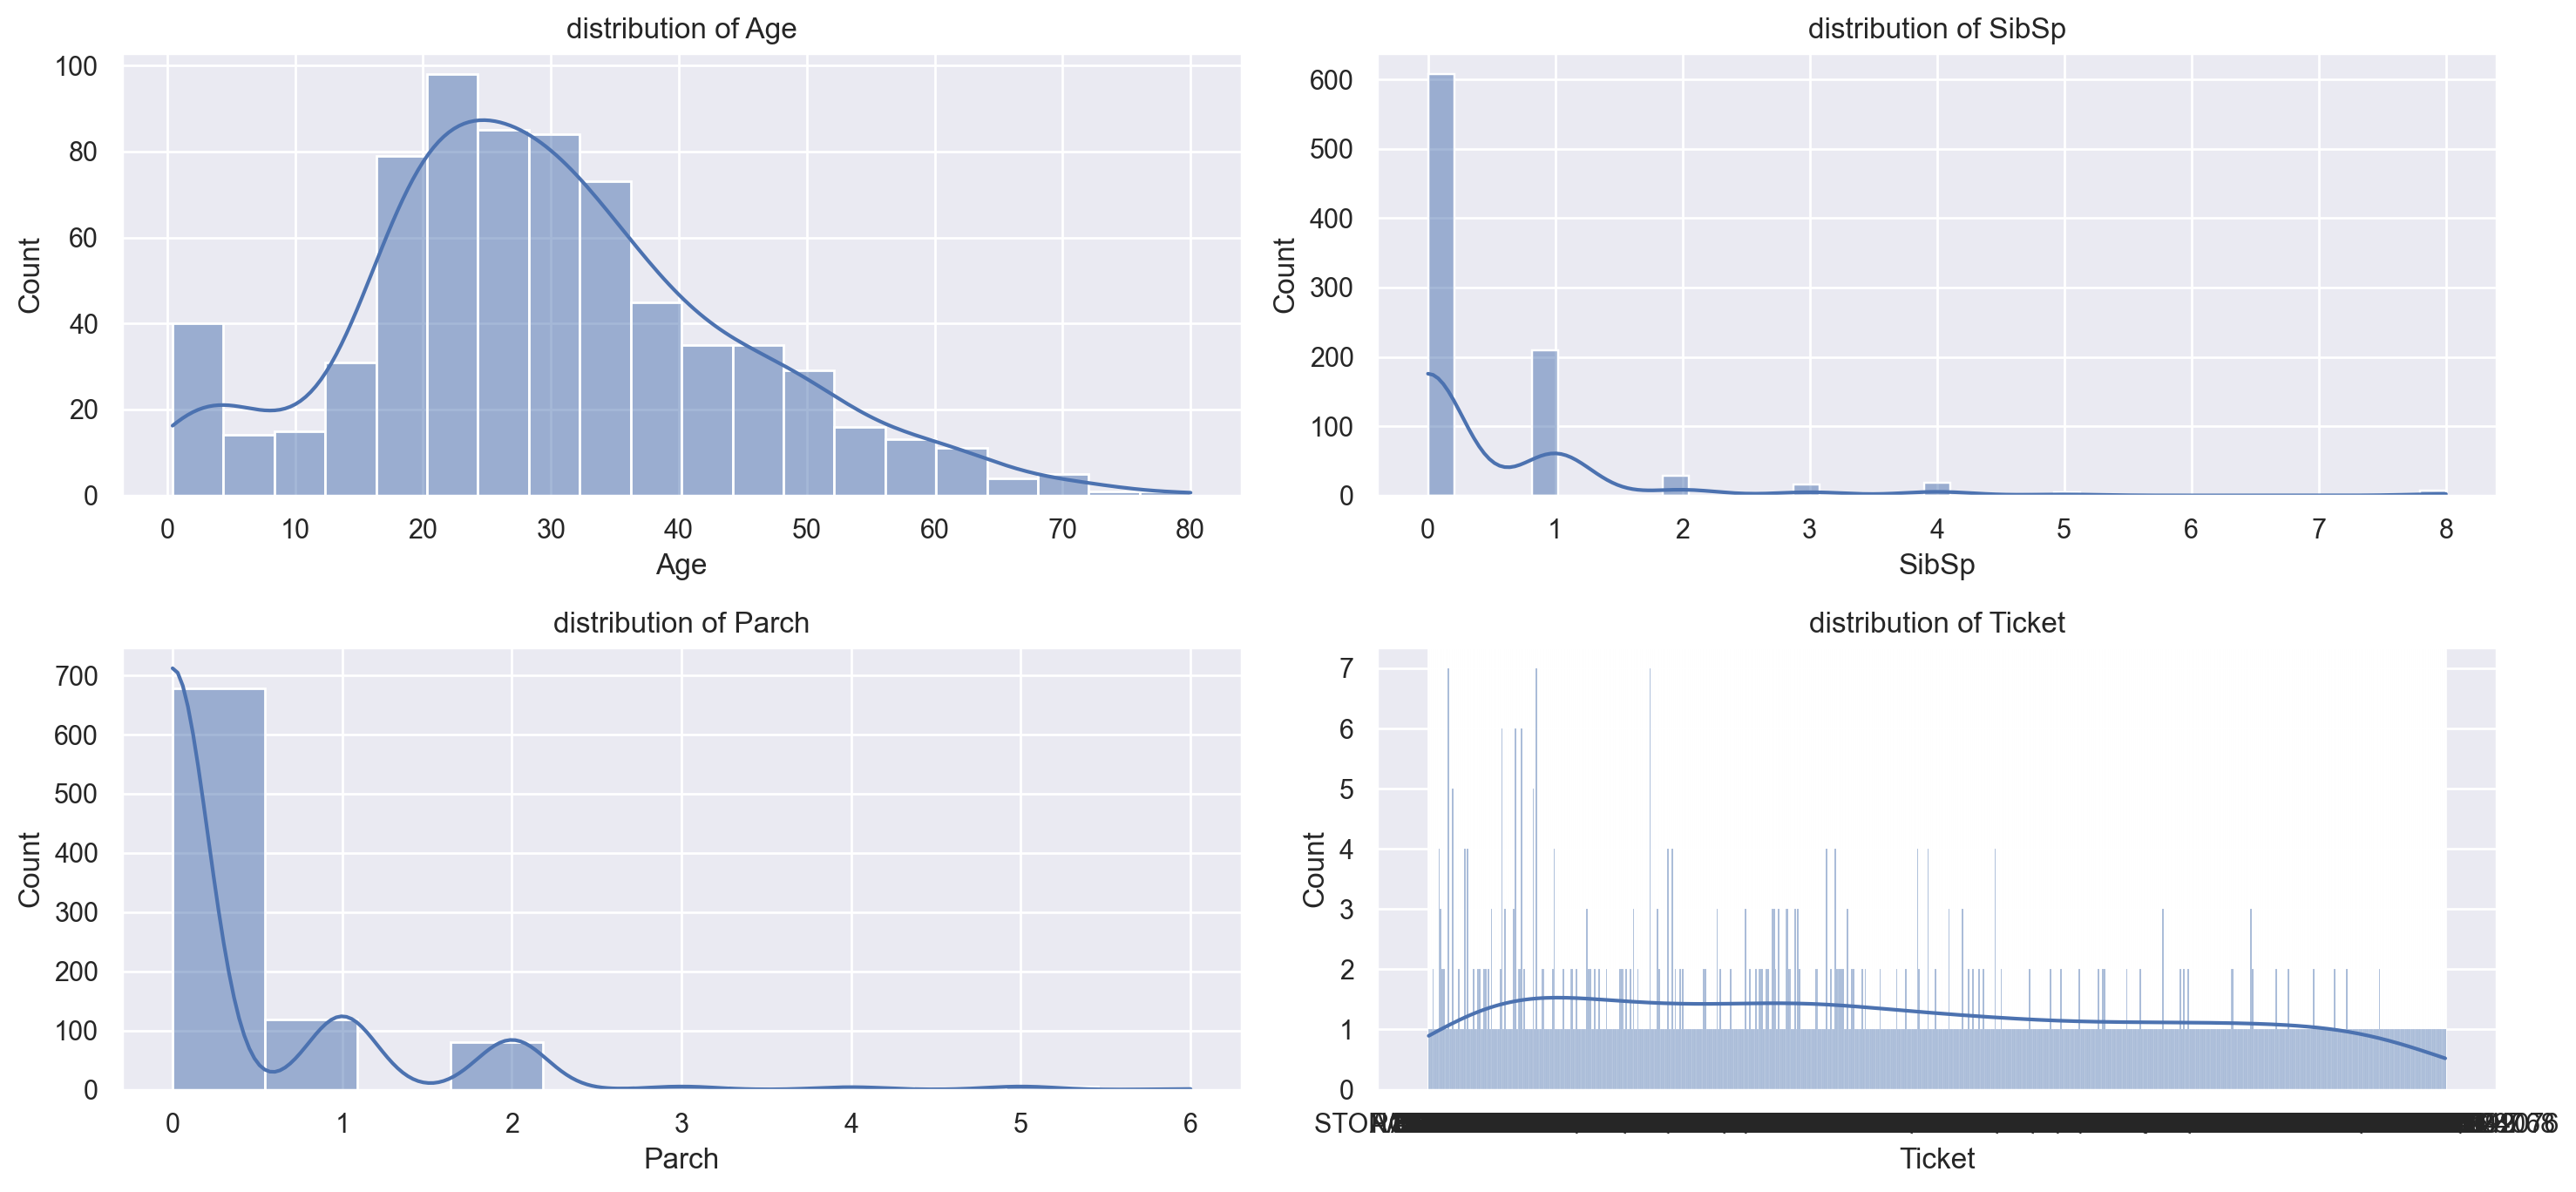

In [16]:
plt.figure(figsize=(15,7),dpi=200)

plt.subplot(2,2,1)
sns.histplot(train_data['Age'],kde=True)
plt.title('distribution of Age')

plt.subplot(2,2,2)
sns.histplot(train_data['SibSp'],kde=True)
plt.title('distribution of SibSp')


plt.subplot(2,2,3)
sns.histplot(train_data['Parch'],kde=True)
plt.title('distribution of Parch')


plt.subplot(2,2,4)
sns.histplot(train_data['Ticket'],kde=True)
plt.title('distribution of Ticket')

plt.tight_layout()  
plt.show()


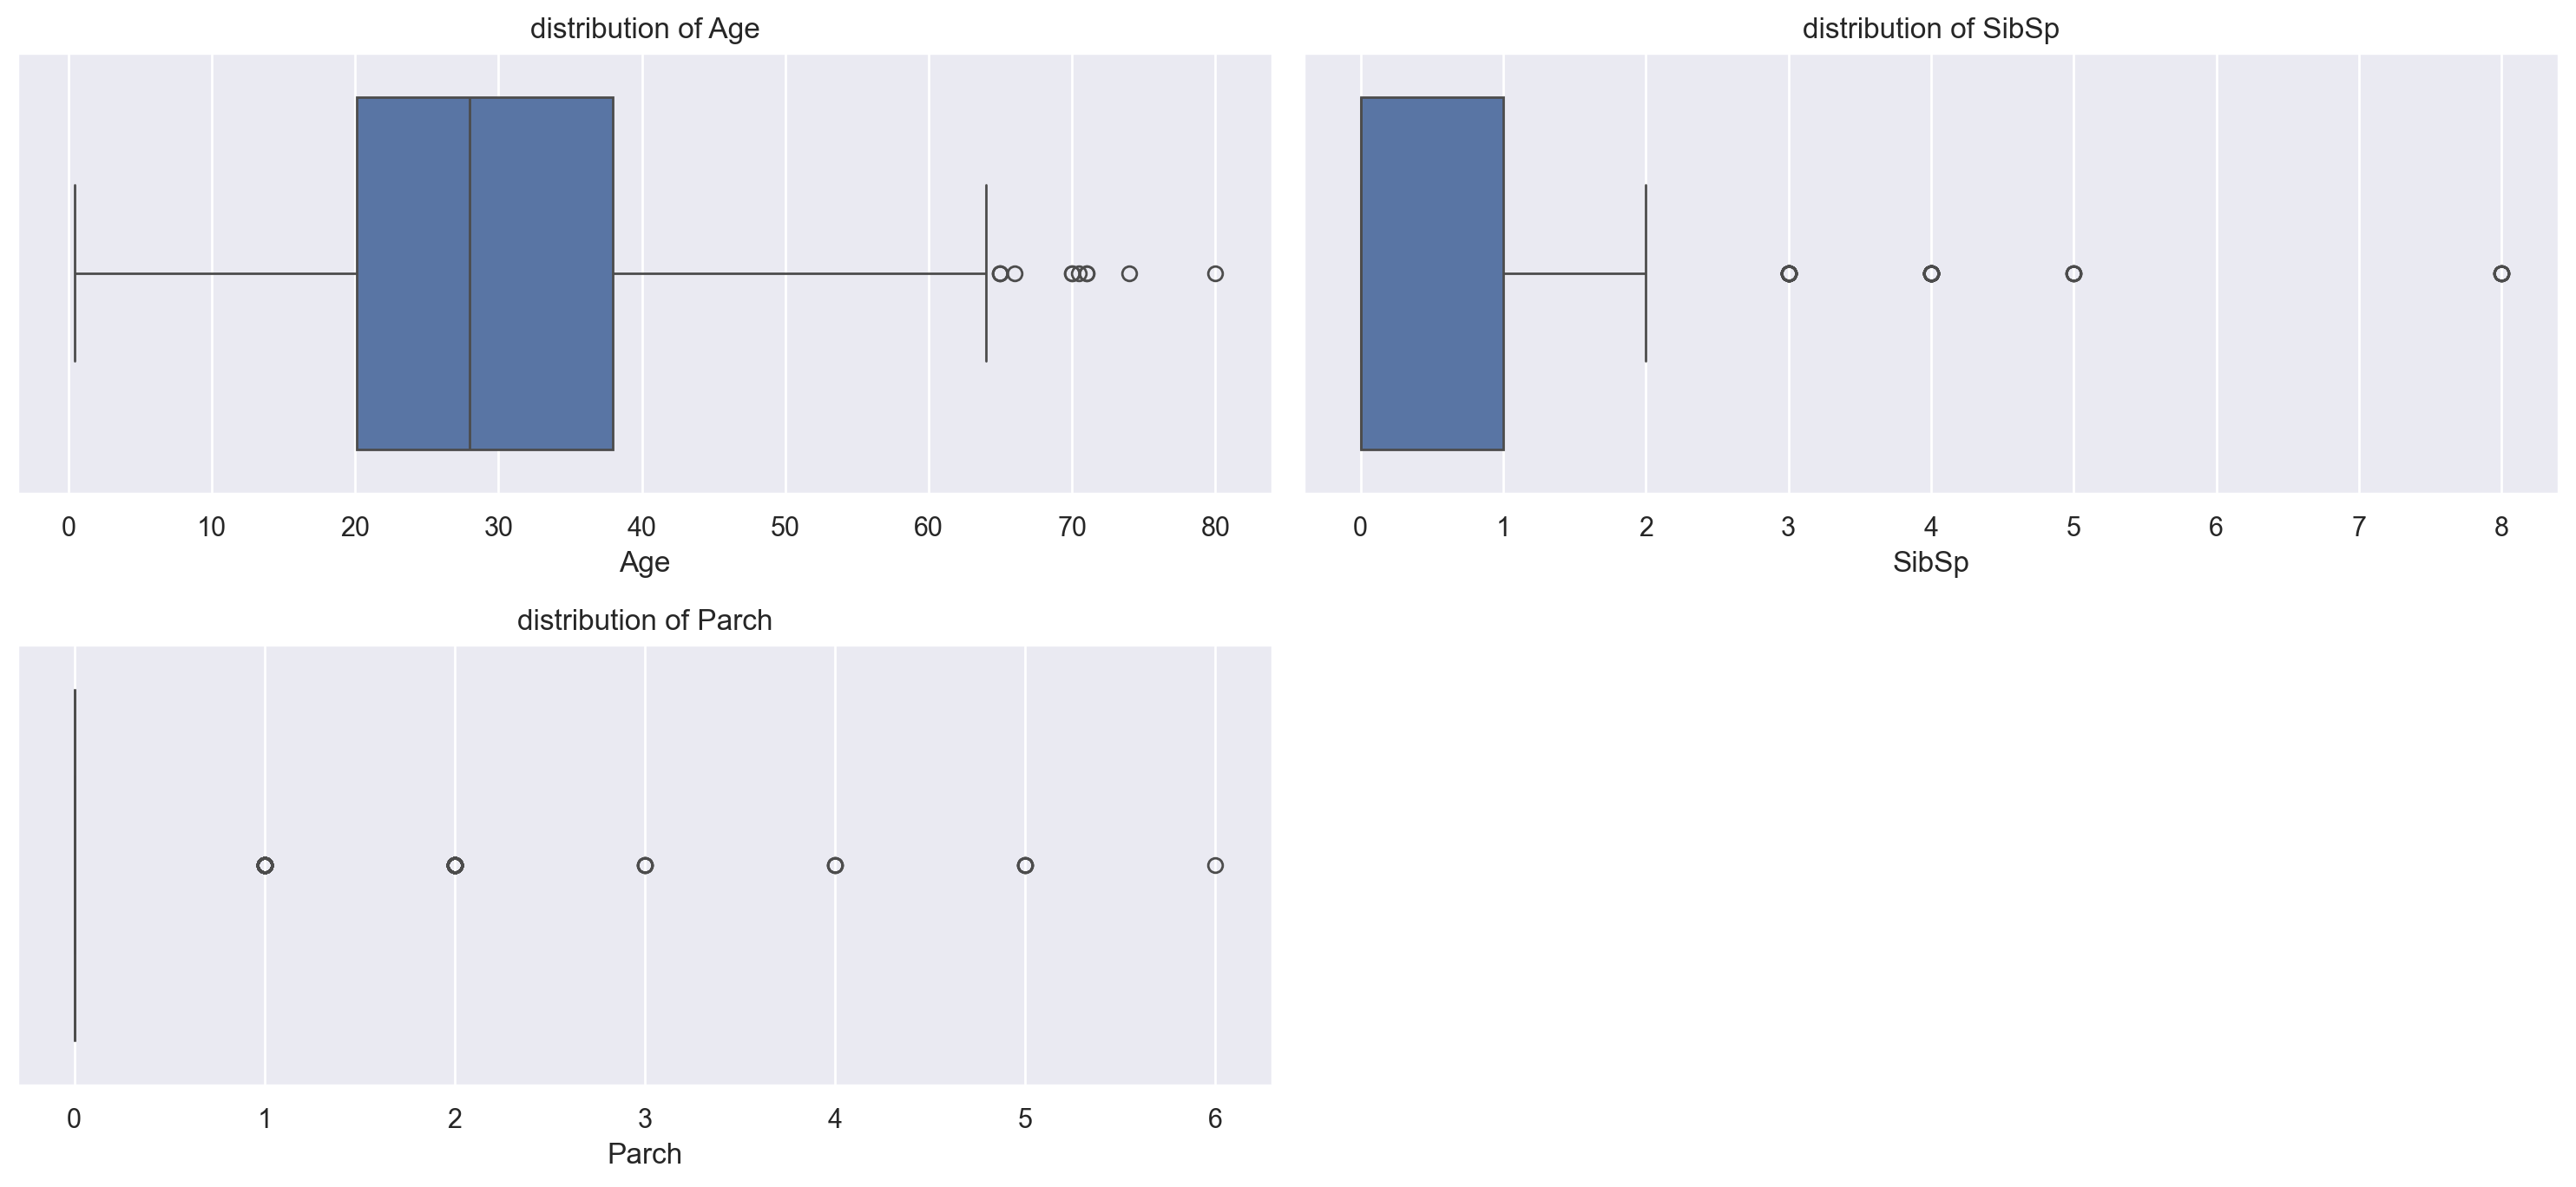

In [17]:
plt.figure(figsize=(15,7),dpi=200)

plt.subplot(2,2,1)
sns.boxplot(x=train_data['Age'], orient='h')
plt.title('distribution of Age')

plt.subplot(2,2,2)
sns.boxplot(x=train_data['SibSp'], orient='h')
plt.title('distribution of SibSp')

plt.subplot(2,2,3)
sns.boxplot(x=train_data['Parch'], orient='h')
plt.title('distribution of Parch')

plt.tight_layout()  
plt.show()

In [18]:
pd.DataFrame(train_data.describe()['Age'])

,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


In [19]:
pd.DataFrame(train_data.describe()['Fare'])

,Fare
count,891.000000
mean,32.204208
std,49.693429
min,0.000000
25%,7.910400
50%,14.454200
75%,31.000000
max,512.329200


In [20]:
train_data['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [21]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Handling Missing Values on the Train Data

In [22]:
train_data['Age'].fillna(value=train_data["Age"].mean(), inplace=True)
train_data['Embarked'][61] = 'Q'
train_data['Embarked'][829] = 'S'
train_data['Cabin'].fillna(value='unavailable', inplace=True)

In [23]:
combine = [train_data, test_data]
print("Before", train_data.shape, test_data.shape, combine[0].shape, combine[1].shape)

Before (891, 12) (418, 11) (891, 12) (418, 11)


In [24]:
train_data = train_data.drop(['Cabin'], axis=1, errors='ignore')
test_data = test_data.drop(['Cabin'], axis=1, errors='ignore')

In [25]:
train_data = train_data.drop(['Ticket'], axis=1, errors='ignore')
test_data = test_data.drop(['Ticket'], axis=1, errors='ignore')

In [26]:
print("After", train_data.shape, test_data.shape, combine[0].shape, combine[1].shape)

After (891, 10) (418, 9) (891, 12) (418, 11)


In [27]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [28]:
combine = [train_data, test_data]

#extract a title for each Name in the train and test datasets
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_data['Title'], train_data['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [29]:

#replace various titles with more common names
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col',
    'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
    
    dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train_data[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()



,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000


In [30]:
#map each of the title groups to a numerical value
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [31]:
# fill missing age with mode age group for each title
mr_age = train_data[train_data["Title"] == 1]["Age"].mode() #Young Adult
miss_age = train_data[train_data["Title"] == 2]["Age"].mode() #Student
mrs_age = train_data[train_data["Title"] == 3]["Age"].mode() #Adult
master_age = train_data[train_data["Title"] == 4]["Age"].mode() #Baby
royal_age = train_data[train_data["Title"] == 5]["Age"].mode() #Adult
rare_age = train_data[train_data["Title"] == 6]["Age"].mode() #Adult

age_title_mapping = {1: "Young Adult", 2: "Student", 3: "Adult", 4: "Baby", 5: "Adult", 6: "Adult"}

#I tried to get this code to work with using .map(), but couldn't.
#I've put down a less elegant, temporary solution for now.
#train_data = train_data.fillna({"Age": train_data["Title"].map(age_title_mapping)})
#test_data = test_data.fillna({"Age": test_data["Title"].map(age_title_mapping)})

for x in range(len(train_data["Age"])):
    if train_data["Age"].iloc[x] == "Unknown":
        train_data["Age"].iloc[x] = age_title_mapping[train_data["Title"].iloc[x]]
        
for x in range(len(test_data["Age"])):
    if test_data["Age"].iloc[x] == "Unknown":
        test_data["Age"].iloc[x] = age_title_mapping[test_data["Title"].iloc[x]]

In [32]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']

In [33]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,1.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,1.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,2.0,0,0,8.0500,S,1


In [34]:
#map each Embarked value to a numerical value
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
train_data['Embarked'] = train_data['Embarked'].map(embarked_mapping)
test_data['Embarked'] = test_data['Embarked'].map(embarked_mapping)

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,1.0,1,0,7.2500,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2.0,1,0,71.2833,2,3
2,3,1,3,"Heikkinen, Miss. Laina",female,1.0,0,0,7.9250,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2.0,1,0,53.1000,1,3
4,5,0,3,"Allen, Mr. William Henry",male,2.0,0,0,8.0500,1,1


In [35]:
train_data['AgeBand'] = pd.cut(train_data['Age'], 5)
train_data[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.387500
1,"(16.0, 32.0]",NaN
2,"(32.0, 48.0]",NaN
3,"(48.0, 64.0]",NaN
4,"(64.0, 80.0]",0.090909


In [36]:
# Fill in missing Fare value in test_data set based on mean fare for that Pclass 
for x in range(len(test_data["Fare"])):
    if pd.isnull(test_data["Fare"].iloc[x]):
        pclass = test_data["Pclass"].iloc[x]
        test_data.at[x, "Fare"] = round(train_data[train_data["Pclass"] == pclass]["Fare"].mean(), 4)

# Map Fare values into groups of numerical values
train_data['FareBand'] = pd.qcut(train_data['Fare'], 4, labels=[1, 2, 3, 4])
test_data['FareBand'] = pd.qcut(test_data['Fare'], 4, labels=[1, 2, 3, 4])

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand,FareBand
0,1,0,3,"Braund, Mr. Owen Harris",male,1.0,1,0,7.2500,1,1,"(-0.08, 16.0]",1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2.0,1,0,71.2833,2,3,"(-0.08, 16.0]",4
2,3,1,3,"Heikkinen, Miss. Laina",female,1.0,0,0,7.9250,1,2,"(-0.08, 16.0]",2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2.0,1,0,53.1000,1,3,"(-0.08, 16.0]",4
4,5,0,3,"Allen, Mr. William Henry",male,2.0,0,0,8.0500,1,1,"(-0.08, 16.0]",2


In [37]:
# Initialize and fit encoder
encoder = LabelEncoder()
train_data['Sex'] = encoder.fit_transform(train_data['Sex'])  # male=0, female=1
test_data['Sex'] = encoder.fit_transform(test_data['Sex'])  # male=0, female=1

train_data.drop(['Name', 'AgeBand'], axis=1, inplace=True)
test_data.drop(['Name'], axis=1, inplace=True)
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FareBand
0,1,0,3,1,1.0,1,0,7.2500,1,1,1
1,2,1,1,0,2.0,1,0,71.2833,2,3,4
2,3,1,3,0,1.0,0,0,7.9250,1,2,2
3,4,1,1,0,2.0,1,0,53.1000,1,3,4
4,5,0,3,1,2.0,0,0,8.0500,1,1,2


In [38]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_data[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [39]:
for dataset in combine:
    dataset['Solitary'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'Solitary'] = 1

train_data[['Solitary', 'Survived']].groupby(['Solitary'], as_index=False).mean()

,Solitary,Survived
0,0,0.505650
1,1,0.303538


In [40]:
# Drop 'SibSp' and 'Parch' columns from train_data and test_data
train_data.drop(['SibSp', 'Parch'], axis=1, inplace=True)
test_data.drop(['SibSp', 'Parch'], axis=1, inplace=True)

combine = [train_data, test_data]

train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FareBand,FamilySize,Solitary
0,1,0,3,1,1.0,7.2500,1,1,1,2,0
1,2,1,1,0,2.0,71.2833,2,3,4,2,0
2,3,1,3,0,1.0,7.9250,1,2,2,1,1
3,4,1,1,0,2.0,53.1000,1,3,4,2,0
4,5,0,3,1,2.0,8.0500,1,1,2,1,1


In [41]:
test_data.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,FareBand,FamilySize,Solitary
0,892,3,1,2.0,7.8292,3,1,1,1,1
1,893,3,0,2.0,7.0000,1,3,1,2,0
2,894,2,1,3.0,9.6875,3,1,2,1,1
3,895,3,1,1.0,8.6625,1,1,2,1,1
4,896,3,0,1.0,12.2875,1,3,2,3,0


In [42]:
pd.DataFrame(train_data.describe(include='all')['FareBand'])

,FareBand
count,891.0
unique,4.0
top,2.0
freq,224.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN


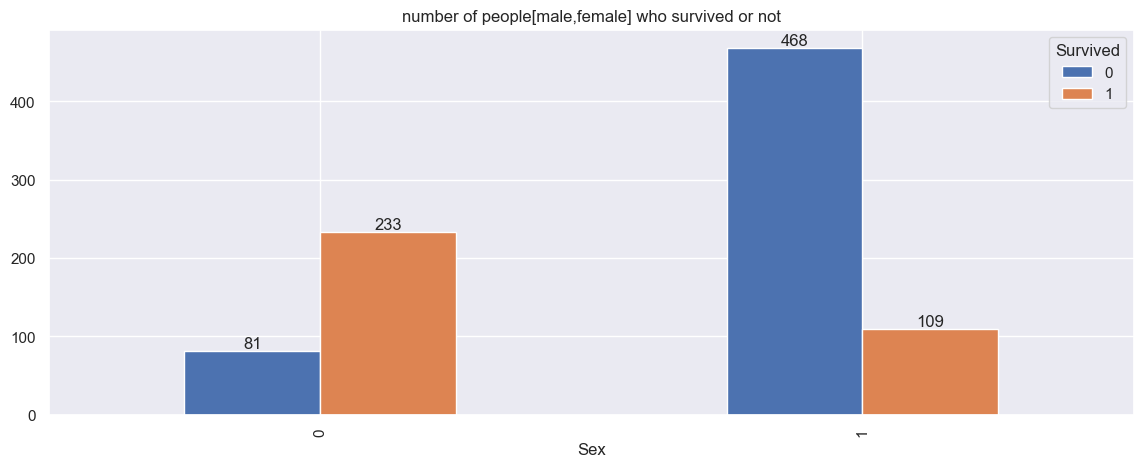

In [43]:


b = pd.crosstab(train_data['Sex'], train_data['Survived']).plot(kind='bar', figsize=(14,5))
plt.title('number of people[male,female] who survived or not')

for i in b.containers:
    b.bar_label(i)
plt.show()



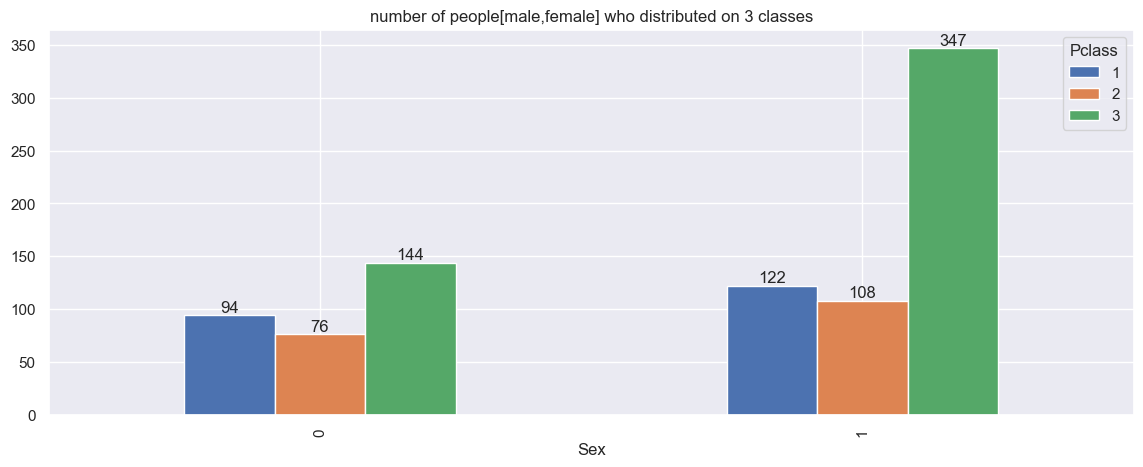

In [44]:
b = pd.crosstab(train_data['Sex'], train_data['Pclass']).plot(kind='bar', figsize=(14,5))
plt.title('number of people[male,female] who distributed on 3 classes')
for i in b.containers:
    b.bar_label(i)
plt.show()

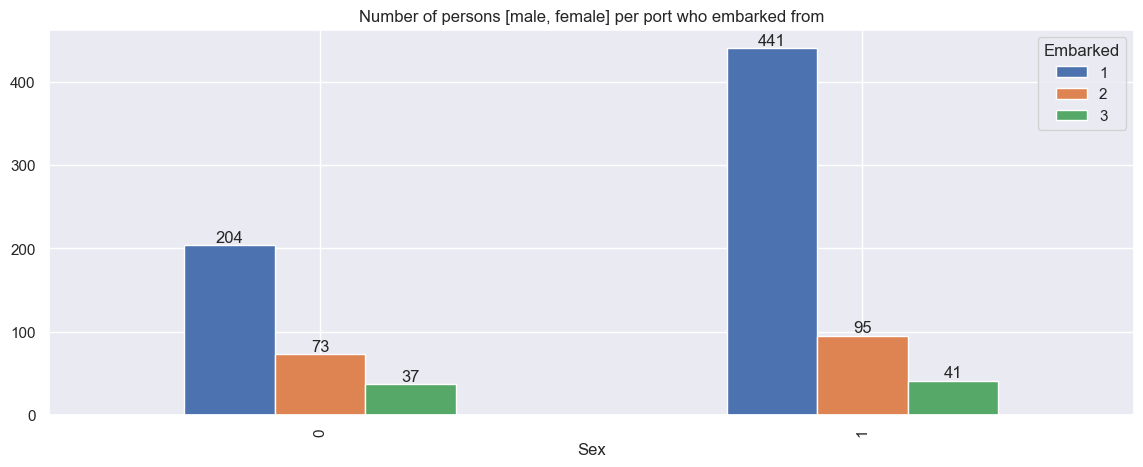

In [45]:
b = pd.crosstab(train_data['Sex'], train_data['Embarked']).plot(kind='bar', figsize=(14,5))
plt.title('Number of persons [male, female] per port who embarked from')
for i in b.containers:
    b.bar_label(i)
plt.show()

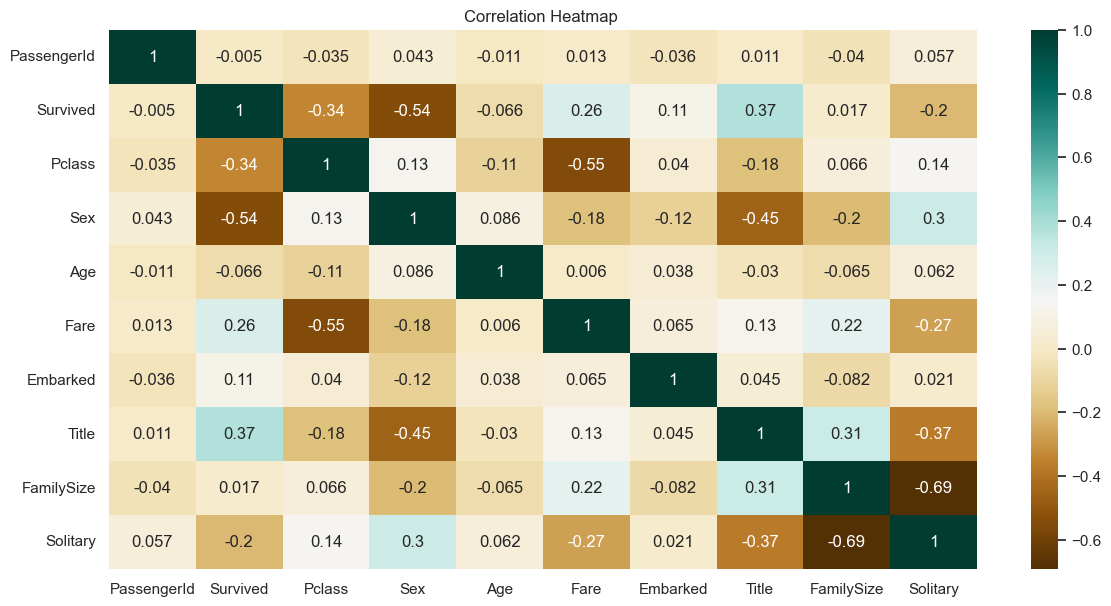

In [46]:
cm = train_data.corr(numeric_only=True)
plt.figure(figsize=(14,7))
sns.heatmap(cm, annot=True, cmap='BrBG')
plt.title('Correlation Heatmap ')
plt.show()

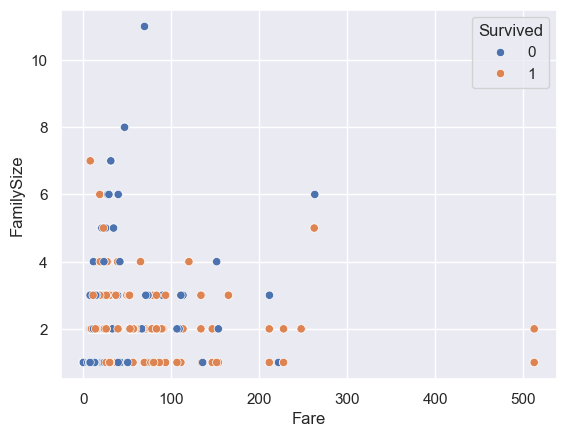

In [47]:
sns.scatterplot(x=train_data['Fare'], y=train_data['FamilySize'], hue=train_data['Survived'])
plt.show()

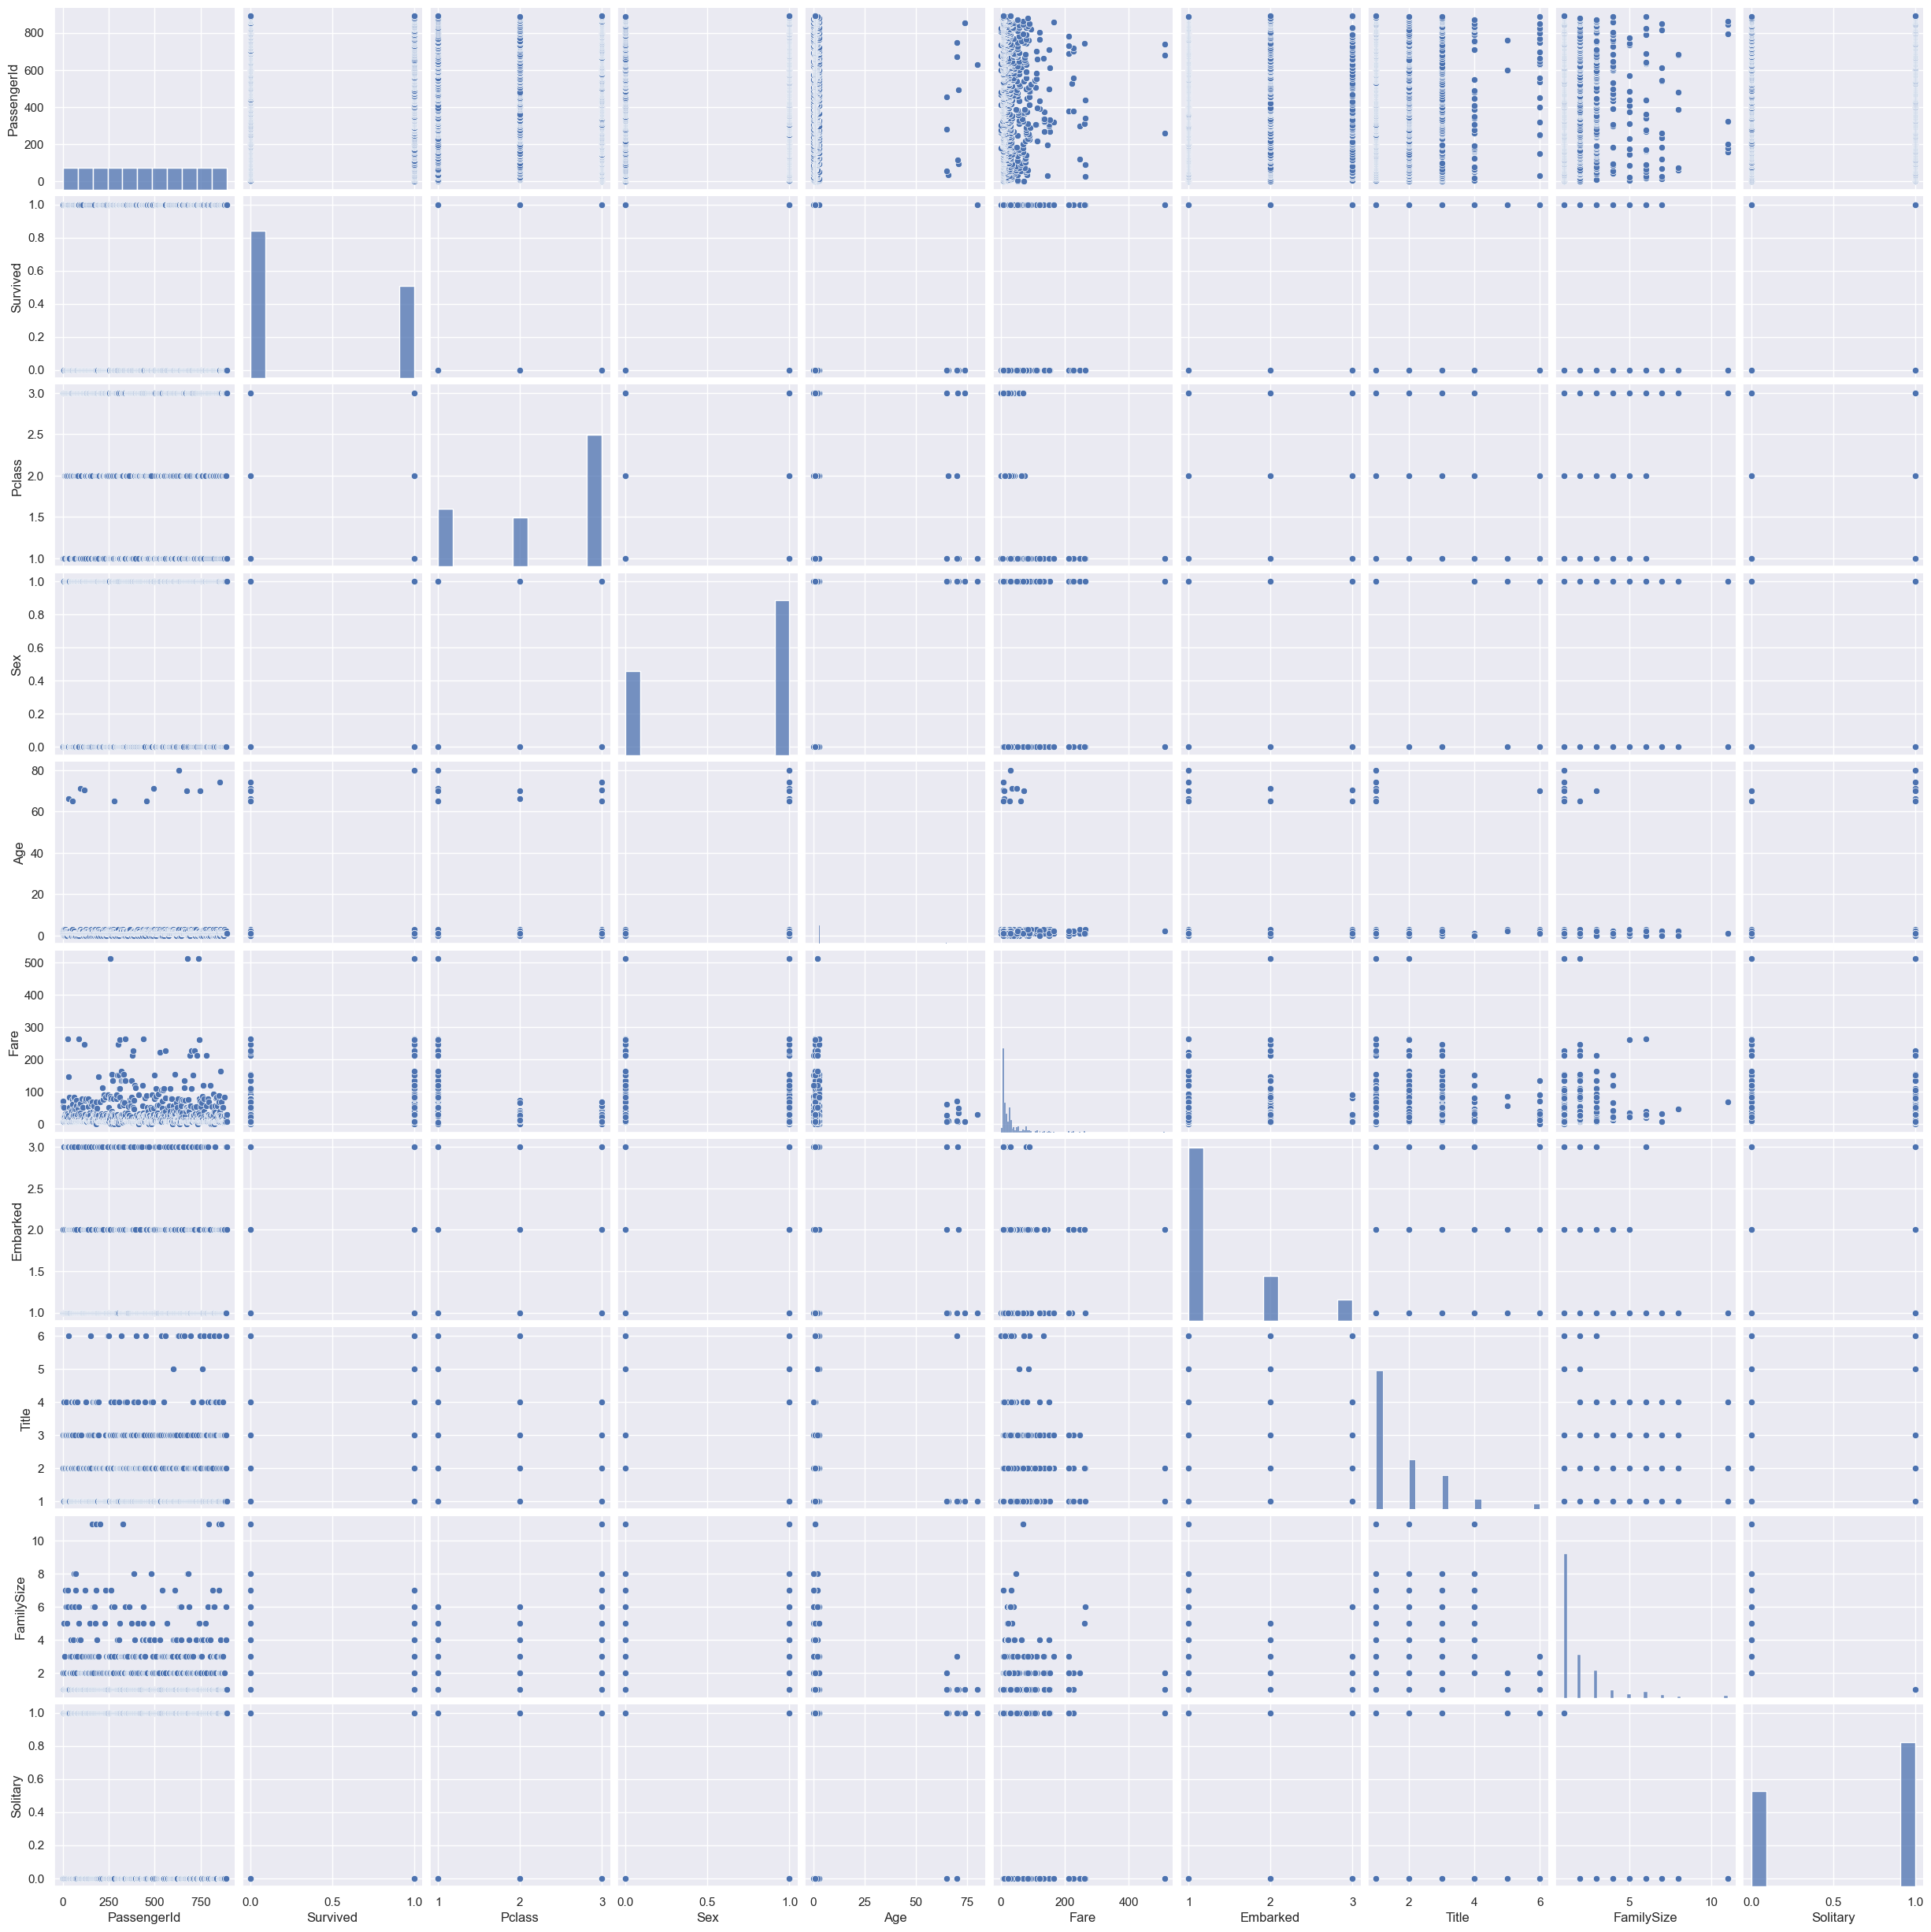

In [48]:
sns.pairplot(train_data)

Model to Classification

In [49]:
train_data.head()


,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FareBand,FamilySize,Solitary
0,1,0,3,1,1.0,7.2500,1,1,1,2,0
1,2,1,1,0,2.0,71.2833,2,3,4,2,0
2,3,1,3,0,1.0,7.9250,1,2,2,1,1
3,4,1,1,0,2.0,53.1000,1,3,4,2,0
4,5,0,3,1,2.0,8.0500,1,1,2,1,1


In [50]:

encoder = LabelEncoder()
train_data['sex'] = encoder.fit_transform(train_data['Sex'])
test_data['sex'] = encoder.fit_transform(test_data['Sex'])

x = train_data[['Pclass', 'sex', 'FamilySize']]
y = train_data['Survived']

scaler = StandardScaler()
x_new = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.2, random_state=42)


Best Algorithm

In [51]:
tree=cross_val_score(DecisionTreeClassifier(),x_train,y_train)
np.average(tree)

0.7921107061952133

In [52]:
svm=cross_val_score(SVC(),x_train,y_train)
np.mean(svm)

0.8117502216093767

In [53]:
random_forest=cross_val_score(RandomForestClassifier(),x_train,y_train)
np.mean(random_forest)

0.7977051117896188

In [54]:
stochastic_gradient_descent=cross_val_score(LogisticRegression(),x_train,y_train)
np.mean(stochastic_gradient_descent)

0.8047276666994977

In [55]:
linear_svc=cross_val_score(SVC(kernel='linear'),x_train,y_train)
np.mean(linear_svc)

0.7878755047769133

In [56]:
percepton=cross_val_score(SVC(kernel='poly'),x_train,y_train)
np.mean(percepton)

0.8019304639022948

In [57]:
models = pd.DataFrame({
    'Model': ['Decision Tree', 'SVM', 'Random Forest', 'Cross Validation SGD', 'Linear SVC', 'Perceptron'],
    'Score': [np.average(tree), np.mean(svm), np.mean(random_forest), np.mean(stochastic_gradient_descent),
              np.mean(linear_svc), np.mean(percepton)]
})
models.sort_values(by='Score', ascending=False, inplace=True)
print(models)

                  Model     Score
1                   SVM  0.811750
3  Cross Validation SGD  0.804728
5            Perceptron  0.801930
2         Random Forest  0.797705
0         Decision Tree  0.792111
4            Linear SVC  0.787876


Best Parameters in SVC

In [58]:
param_grid = {'C': [0.001,0.01, 0.1, 1,1.2,1.4,1.6,2,2.5,5, 10,20,25,75,80, 100],
             'kernel':['rbf','linear','poly']}
grid=GridSearchCV(SVC(),param_grid,cv=5)
grid.fit(x_new,y)
grid.best_params_

{'C': 0.1, 'kernel': 'rbf'}

In [59]:
model=SVC(C=2,kernel='rbf')
model.fit(x_new,y)

SVC(C=2)

In [60]:


model.score(x_train,y_train)



0.8089887640449438

In [61]:
model.score(x_test,y_test)

0.7932960893854749

In [62]:
prediction_in_train_data=model.predict(x_test)
prediction_in_train_data

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [63]:
classification_report=classification_report(y_test,prediction_in_train_data)
classification_report

'              precision    recall  f1-score   support\n\n           0       0.79      0.88      0.83       105\n           1       0.79      0.68      0.73        74\n\n    accuracy                           0.79       179\n   macro avg       0.79      0.78      0.78       179\nweighted avg       0.79      0.79      0.79       179\n'

<Axes: >

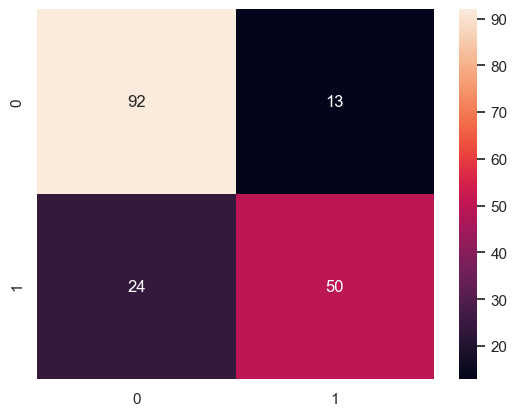

In [64]:
cm=confusion_matrix(y_test,prediction_in_train_data)
sns.heatmap(cm,annot=True)

In [65]:
test_data['Fare'].fillna(value=test_data['Fare'].mean(), inplace=True)

test_data.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,FareBand,FamilySize,Solitary,sex
0,892,3,1,2.0,7.8292,3,1,1,1,1,1
1,893,3,0,2.0,7.0000,1,3,1,2,0,0
2,894,2,1,3.0,9.6875,3,1,2,1,1,1
3,895,3,1,1.0,8.6625,1,1,2,1,1,1
4,896,3,0,1.0,12.2875,1,3,2,3,0,0


In [66]:
# Select only the columns used for training
test_features = test_data[['Pclass', 'sex', 'FamilySize']]
# Scale the test features using the same scaler
test_features_scaled = scaler.transform(test_features)
prediction_data_test = model.predict(test_features_scaled)
prediction_data_test

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [67]:
# Input order: [Pclass, sex, FamilySize]
# Example: 3rd class, female (sex=1), FamilySize=1 (alone)
input_data = [[3, 1, 1]]
input_data_scaled = scaler.transform(input_data)
model.predict(input_data_scaled)

array([0], dtype=int64)

In [68]:
submission = pd.DataFrame({
        "PassengerId": test_data["PassengerId"],
        "Survived": prediction_data_test
    })
# submission.to_csv('../output/submission.csv', index=False)